# Análise de Dados com Métodos de Aprendizado de Máquina

## Introdução ao Aprendizado de Máquina

### Daniel Rocha da Silva, Laura Kubitschek Fiorindo

Link para repositório no GitHub: [Repositório no GitHub](https://github.com/danielrochas/ML_Trabalho/tree/main/Trabalho%202)

Descrição do trabalho: [Descrição.pdf](https://github.com/danielrochas/ML_Trabalho/blob/main/Trabalho%202/Descrição.pdf)

### Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score,mean_squared_error
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA

In [2]:
def avaliacao_classificador(modelo, metodos_avaliacao, features, target, cv):
    for metodo in metodos_avaliacao:
        score = cross_val_score(modelo, features, target, cv = cv, scoring = metodo)
        print(metodos_avaliacao[metodo], np.round(score,2), "Média:", np.round(np.mean(score),2))

### Problema 1

In [3]:
prostate_data = pd.read_csv('data/prostate.data', sep="\t")
prostate_data.head(5)

,%,lcavol,lweigh,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


###### Visualização da variável resposta

(array([ 4.,  3.,  7., 17., 17., 26., 14.,  4.,  2.,  3.]),
 array([-0.4307829 ,  0.17058861,  0.77196012,  1.37333163,  1.97470314,
         2.57607465,  3.17744616,  3.77881767,  4.38018918,  4.98156069,
         5.5829322 ]),
 <BarContainer object of 10 artists>)

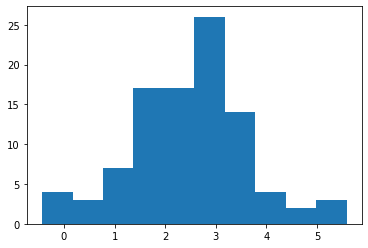

In [4]:
%matplotlib inline

plt.hist(prostate_data["lpsa"])

Por meio do histrograma da variável resposta *lpsa* nota-se que ela possui distribuição semelhante à Normal, uma vez que possui maior frequência nos valores centrais e menor frequência nas caudas à esquerda e à direita.

###### Separação entre *features* e *target* e Padronização das features

In [5]:
features_prostate = prostate_data.drop(columns = {"%", "lpsa"})
target_prostate = prostate_data["lpsa"]

scaler = StandardScaler()
features_prostate_scaled = scaler.fit_transform(features_prostate)

###### Separação do conjunto de treinamento (80%) e do conjunto de teste (20%)

In [6]:
features_prostate_train, features_prostate_test, target_prostate_train, target_prostate_test = \
    train_test_split(features_prostate_scaled, target_prostate, test_size = 0.2, random_state = 13)

###### Ajuste e Resultado do Primeiro Trabalho

In [7]:
lr_prostate = LinearRegression()
modelo_lr_prostate =lr_prostate.fit(features_prostate_train, target_prostate_train);

# Validação
print("R^2: ", modelo_lr_prostate.score(features_prostate_test, target_prostate_test))

print("\n")

print("Intercepto", modelo_lr_prostate.intercept_)
for i in range(len(modelo_lr_prostate.coef_)):
    print(prostate_data.columns[i], modelo_lr_prostate.coef_[i])

print("\n")
    
target_predicted = modelo_lr_prostate.predict(features_prostate_test)
print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test, target_predicted),2))

R^2:  0.6412486024604561


Intercepto 2.472079597636012
% 0.6308787251424092
lcavol 0.26544671319484003
lweigh -0.124630769455823
age 0.04533297181417791
lbph 0.3091557905043822
svi -0.1357312385852475
lcp 0.06860159996008115
gleason 0.08423788362411491


EQM Conjunto Teste:  0.6


###### Ajuste Regressão com Regularização

In [8]:
regression = Lasso(alpha=0.5)
regression_prostate = regression.fit(features_prostate_train, target_prostate_train)

pred_reg_prostate = regression_prostate.predict(features_prostate_test)

explained_variance = explained_variance_score(target_prostate_test, pred_reg_prostate)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_prostate_test, pred_reg_prostate)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_prostate_test, pred_reg_prostate)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test, pred_reg_prostate),2))

Escore Variância Explicada:0.28
MAE: 0.84
R^2: 0.28
EQM Conjunto Teste:  1.2


###### Ajuste Árvore de Decisão

In [9]:
decisiontree = DecisionTreeRegressor(random_state=0)
arv_dec_prostate = decisiontree.fit(features_prostate_train, target_prostate_train)

pred_arv_dec_prostate = arv_dec_prostate.predict(features_prostate_test)

explained_variance = explained_variance_score(target_prostate_test, pred_arv_dec_prostate)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_prostate_test, pred_arv_dec_prostate)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_prostate_test, pred_arv_dec_prostate)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test, pred_arv_dec_prostate),2))

Escore Variância Explicada:0.35
MAE: 0.82
R^2: 0.34
EQM Conjunto Teste:  1.1


###### Ajuste Floresta Aleatória

In [10]:
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
rand_for_prostate = randomforest.fit(features_prostate_train, target_prostate_train)

pred_rand_for_prostate = rand_for_prostate.predict(features_prostate_test)

explained_variance = explained_variance_score(target_prostate_test, pred_rand_for_prostate)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_prostate_test, pred_rand_for_prostate)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_prostate_test,pred_rand_for_prostate)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test, pred_rand_for_prostate),2))

Escore Variância Explicada:0.52
MAE: 0.71
R^2: 0.52
EQM Conjunto Teste:  0.81


###### Ajuste SVM

In [11]:
svm = SVR(kernel="linear")
svm_prostate = svm.fit(features_prostate_train, target_prostate_train)

pred_svm_prostate = svm_prostate.predict(features_prostate_test)

explained_variance = explained_variance_score(target_prostate_test, pred_svm_prostate)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_prostate_test, pred_svm_prostate)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_prostate_test,pred_svm_prostate)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test,pred_svm_prostate),2))

Escore Variância Explicada:0.66
MAE: 0.61
R^2: 0.66
EQM Conjunto Teste:  0.57


###### Ajuste RNA

In [12]:
rna = MLPRegressor(random_state=13, learning_rate_init=0.05)
rna_prostate = rna.fit(features_prostate_train, target_prostate_train)

pred_rna_prostate = rna_prostate.predict(features_prostate_test)

explained_variance = explained_variance_score(target_prostate_test, pred_rna_prostate)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_prostate_test, pred_rna_prostate)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_prostate_test,pred_rna_prostate)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_prostate_test,pred_rna_prostate),2))

Escore Variância Explicada:0.63
MAE: 0.67
R^2: 0.59
EQM Conjunto Teste:  0.69


###### Comparação e Análise dos Resultados

Comparando os modelos ajustados, nota-se que a Regressão Linear e o SVM foram os que obtiveram melhor ajuste, com um valor de R2 em torno de 0.65. Os demais modelos (Regressão Lasso, Árvore de Decisão, Floresta Aleatória e RNA) não obtiveram resultados satisfatórios em relação aos citados anteriomente, por possuírem um valor de R2 abaixo, sendo o menor deles no modelo Lasso, e também um erro quadrático médio maior.

Como dito anteriormente, os resultados obtidos pela Regressão Linear e pelo SVM foram muito próximos, no entanto, no segundo modelo o erro quadrático médio foi um pouco menor, o que faz dele um melhor modelo para predição da variável de interesse *lpsa*.

### Problema 2

In [13]:
card_data = pd.read_csv('data/card.csv', sep=",")
card_data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,y
0,1,0,0,0.000000,1,0.178571,0,1,0,0,...,0,0.000000,0,1,0,0,0.000,0,0.000000,1
1,0,1,0,0.110226,0,0.178571,0,1,0,0,...,0,0.000000,0,1,0,0,0.000,0,0.000000,1
2,1,0,0,0.223008,0,0.129464,1,0,0,0,...,0,0.000000,1,1,0,0,0.050,0,0.000000,1
3,1,0,0,0.078947,0,0.062500,0,1,0,0,...,0,0.000000,1,1,0,0,0.056,0,0.169210,1
4,0,1,0,0.530075,0,0.053571,1,0,0,0,...,0,0.000000,1,1,0,0,0.050,0,0.289757,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,0,0,0.139098,0,0.026786,1,0,0,0,...,0,0.000000,1,0,0,1,0.160,0,0.000000,1
686,1,0,0,0.233083,0,0.528214,1,0,0,0,...,1,0.074627,1,1,0,0,0.084,0,0.000000,0
687,1,0,0,0.260602,0,0.053571,0,1,0,0,...,0,0.000000,0,0,0,1,0.080,0,0.000000,1
688,1,0,0,0.357143,0,0.029821,1,0,0,0,...,0,0.000000,0,1,0,0,0.060,0,0.155805,1


###### Visualização da variável resposta

Text(0.5, 0.98, 'Distribuição dos dados da variável resposta (y)')

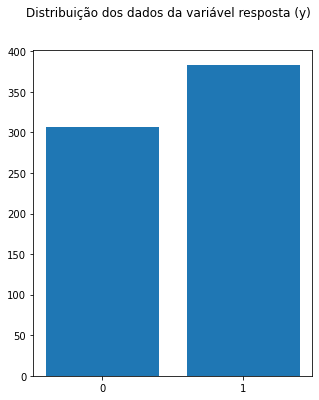

In [14]:
%matplotlib inline


unique, counts = np.unique(card_data["y"], return_counts = True)
unique = ''.join(str(e) for e in unique)
plot_data = dict(zip(unique, counts))

names = list(plot_data.keys())
values = list(plot_data.values())

fig, axs = plt.subplots(1, 1, figsize = (5, 6))
axs.bar(names, values)
fig.suptitle('Distribuição dos dados da variável resposta (y)')

Por meio do gráfico acima, é possível notar que a variável resposta, que é categórica, possui apenas 2 níveis, sendo eles 0 ou 1. Além disso, as duas categorias possuem frequências próximas, indicando que os dados estão, de certa forma, balanceados de acordo com a variável resposta. Nesse problema serão ajustados 3 modelos diferentes para avaliação das métricas, são eles: KNN (k=5), Naive Bayes e Regressão Logística.

###### Separação entre *features* e *target*

In [15]:
features_card = card_data.drop(columns = {"y"})
target_card = card_data["y"]

###### Padronização das *features*

In [16]:
scaler = StandardScaler()
features_card_scaled = scaler.fit_transform(features_card)

###### Definição dos métodos de avaliação dos modelos

In [17]:
metodos_avaliacao = {"accuracy": "Acurácia:", "recall": "Recall:", "precision": "Precison:", "f1": "f1:"}

###### Aplicando o método 5-vizinhos mais próximos

In [18]:
neigh_card = KNeighborsClassifier(n_neighbors=5)


# Validação cruzada com método 10-fold
print("Dados padronizados:")
avaliacao_classificador(neigh_card, metodos_avaliacao, features_card_scaled, target_card, cv=10)

print("\n")
print("Dados originais:")
avaliacao_classificador(neigh_card, metodos_avaliacao, features_card, target_card, cv=10)

Dados padronizados:
Acurácia: [0.8  0.8  0.77 0.74 0.83 0.87 0.8  0.83 0.8  0.78] Média: 0.8
Recall: [0.95 0.85 0.9  0.79 0.87 0.87 0.87 0.89 0.84 0.84] Média: 0.87
Precison: [0.76 0.8  0.74 0.75 0.82 0.89 0.79 0.81 0.8  0.78] Média: 0.79
f1: [0.84 0.82 0.81 0.77 0.85 0.88 0.82 0.85 0.82 0.81] Média: 0.83


Dados originais:
Acurácia: [0.77 0.83 0.81 0.83 0.93 0.91 0.86 0.86 0.78 0.86] Média: 0.84
Recall: [0.85 0.85 0.85 0.84 0.92 0.87 0.92 0.95 0.79 0.89] Média: 0.87
Precison: [0.77 0.85 0.82 0.84 0.95 0.97 0.83 0.82 0.81 0.85] Média: 0.85
f1: [0.8  0.85 0.84 0.84 0.93 0.92 0.88 0.88 0.8  0.87] Média: 0.86


Ao ajustar o modelo de 5 vizinhos mais próximos nos dados padronizados e nos dados originais, observou-se melhor resultado no modelo em que foi utilizado os dados originais.

###### Aplicando o método Naive Bayes

In [19]:
gaussian_nb_card = GaussianNB()

# Validação cruzada com método 10-fold
avaliacao_classificador(gaussian_nb_card, metodos_avaliacao, features_card, target_card, cv=10)

Acurácia: [0.67 0.74 0.7  0.67 0.65 0.7  0.74 0.68 0.68 0.65] Média: 0.69
Recall: [0.97 1.   1.   0.87 0.97 0.95 1.   0.89 0.95 0.97] Média: 0.96
Precison: [0.63 0.68 0.65 0.65 0.62 0.65 0.68 0.65 0.64 0.62] Média: 0.65
f1: [0.77 0.81 0.79 0.74 0.76 0.77 0.81 0.76 0.77 0.76] Média: 0.77


Comparando os resultados do modelo KNN e Naive Bayes, observou-se que o primeiro possui métricas de avaliação melhores, por possuir valores maiores dessas medidas, exceto quando se trata da sensibilidade. Nesse caso, como o modelo Naive Bayes possui alta sensibilidade ele é bom para identificar instâncias positivas quanto a concessão do crédito quando ela é realmente positiva. No entanto, nesse caso a precisão do modelo não é tão boa, indicando que ao classificar uma instância como positiva existe uma proporção considerável delas que na realidade é negativa.

###### Aplicando o método de Regressão Logística

In [20]:
logistic_regression_card = LogisticRegression()

avaliacao_classificador(logistic_regression_card, metodos_avaliacao, features_card, target_card, cv=10)

Acurácia: [0.75 0.88 0.84 0.84 0.87 0.88 0.9  0.86 0.86 0.86] Média: 0.85
Recall: [0.77 0.87 0.9  0.76 0.82 0.84 0.87 0.92 0.79 0.87] Média: 0.84
Precison: [0.79 0.92 0.83 0.94 0.94 0.94 0.94 0.83 0.94 0.87] Média: 0.89
f1: [0.78 0.89 0.86 0.84 0.87 0.89 0.9  0.88 0.86 0.87] Média: 0.86


Comparando o modelo logístico com os demais, ele possui sensibilidade inferior aos modelos KNN e Naive Bayes, no entanto, para as demais métricas, obteve medidas mais elevadas se comparadas com os demais modelos.

###### Aplicando o método de Análise Discriminante

In [21]:
discriminant_card = LinearDiscriminantAnalysis()

avaliacao_classificador(discriminant_card, metodos_avaliacao, features_card, target_card, cv=10)

Acurácia: [0.78 0.9  0.9  0.81 0.84 0.91 0.88 0.88 0.87 0.9 ] Média: 0.87
Recall: [0.74 0.82 0.87 0.71 0.76 0.84 0.84 0.92 0.76 0.87] Média: 0.81
Precison: [0.85 1.   0.94 0.93 0.94 1.   0.94 0.88 1.   0.94] Média: 0.94
f1: [0.79 0.9  0.91 0.81 0.84 0.91 0.89 0.9  0.87 0.9 ] Média: 0.87


###### Aplicando o método de Árvore de Decisão

In [22]:
decisiontree_card = DecisionTreeClassifier(random_state=13)

avaliacao_classificador(decisiontree_card, metodos_avaliacao, features_card, target_card, cv=10)

Acurácia: [0.74 0.72 0.78 0.81 0.81 0.94 0.81 0.86 0.86 0.8 ] Média: 0.81
Recall: [0.79 0.77 0.79 0.74 0.87 0.92 0.87 0.92 0.89 0.82] Média: 0.84
Precison: [0.76 0.75 0.82 0.9  0.8  0.97 0.8  0.83 0.85 0.82] Média: 0.83
f1: [0.77 0.76 0.81 0.81 0.84 0.95 0.84 0.88 0.87 0.82] Média: 0.83


###### Aplicando o método de Florestas Aleatórias

In [23]:
randomforest_card = RandomForestClassifier(random_state=13)

avaliacao_classificador(randomforest_card, metodos_avaliacao, features_card, target_card, cv=10)

Acurácia: [0.78 0.87 0.86 0.84 0.91 0.93 0.91 0.88 0.86 0.88] Média: 0.87
Recall: [0.82 0.87 0.95 0.79 0.89 0.89 0.97 0.95 0.82 0.95] Média: 0.89
Precison: [0.8  0.89 0.82 0.91 0.94 0.97 0.88 0.86 0.91 0.86] Média: 0.88
f1: [0.81 0.88 0.88 0.85 0.92 0.93 0.92 0.9  0.86 0.9 ] Média: 0.89


###### Aplicando o método SVM

In [24]:
SVM_card = SVC(random_state=13)

avaliacao_classificador(SVM_card, metodos_avaliacao, features_card, target_card, cv=10)

Acurácia: [0.75 0.88 0.88 0.84 0.84 0.88 0.9  0.88 0.86 0.88] Média: 0.86
Recall: [0.74 0.85 0.9  0.76 0.76 0.82 0.87 0.89 0.76 0.87] Média: 0.82
Precison: [0.81 0.94 0.9  0.94 0.94 0.97 0.94 0.89 0.97 0.92] Média: 0.92
f1: [0.77 0.89 0.9  0.84 0.84 0.89 0.9  0.89 0.85 0.89] Média: 0.87


###### Aplicando o método RNA

In [25]:
RNA_card = MLPClassifier(random_state=13, learning_rate_init=0.01)

avaliacao_classificador(RNA_card, metodos_avaliacao, features_card, target_card, cv=10)

Acurácia: [0.8  0.84 0.81 0.8  0.9  0.87 0.93 0.86 0.88 0.9 ] Média: 0.86
Recall: [0.82 0.85 0.87 0.76 0.89 0.82 0.97 0.97 0.82 0.89] Média: 0.87
Precison: [0.82 0.87 0.81 0.85 0.92 0.94 0.9  0.8  0.97 0.92] Média: 0.88
f1: [0.82 0.86 0.84 0.81 0.91 0.87 0.94 0.88 0.89 0.91] Média: 0.87


Podemos observar que cada modelo performou melhor a depender da métrica utilizada para a avaliação. Nesse caso, cabe ao banco avaliar qual métrica deve ser maximizada em um modelo para classificação da concessão de crédito. Uma alta sensibilidade indica que o modelo prevê bem instâncias como positivas quanto a concessão de crédito quando ela é realmente positiva. No entanto, também é interessante que a precisão do modelo seja alta, para assim evitar prejuízos ao aumentar a proporção de observações verdadeiramente positivas quando elas foram classificadas positivas. Nesse sentido temos que se o interesse é maximizar a sensibilidade o modelo Naive Bayes é o que se saiu melhor com 96%, já se o interesse for maximizar a precisão temos que o melhor modelo foi a Análise Discriminante com 94% de acerto nas classificações positivas. A métrica f1 representa uma medida de equilíbrio entre a sensibilidade e a precisão (média harmônica entre as duas medidas), para essa medida temos que o modelo de Floresta Aleatória performou melhor.

### Problema 3

Importação e visualização do banco de dados

In [26]:
college_data = pd.read_csv("data/College.csv")
college_data

,Inst.Name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Foi feita a troca da variável *Top10perc* pela variável *Elite*, sendo esta uma variável que assume o valor 0 para valores da variável *Top10perc* no intervalo (-1, 50] e 1 para valores no intervalo (50, 101].

In [27]:
college_data["Elite"] = pd.cut(college_data["Top10perc"], bins = (-1,50,101), labels = False)
college_data = college_data.drop(columns = {"Top10perc"})

Foi feita a troca da variável Private para valores inteiros (Yes = 1; No = 0).

In [28]:
college_data["Private"] = np.where(college_data["Private"] == 'Yes', 1, 0)

Visualização da variável resposta

Text(0.5, 0.98, 'Distribuição dos dados da variável resposta (Elite)')

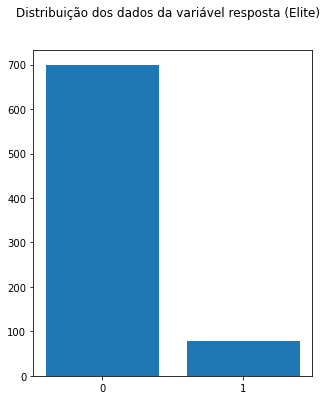

In [29]:
%matplotlib inline


unique, counts = np.unique(college_data["Elite"], return_counts = True)
unique = ''.join(str(e) for e in unique)
plot_data = dict(zip(unique, counts))

names = list(plot_data.keys())
values = list(plot_data.values())

fig, axs = plt.subplots(1, 1, figsize = (5, 6))
axs.bar(names, values)
fig.suptitle('Distribuição dos dados da variável resposta (Elite)')

Com o gráfico acima podemos perceber como a variável resposta apresenta classes (0, 1) com frequência nos dados desbalanceada. Isso deve ser observado nos modelos feitos a seguir.

Separação entre *features* e *target*

In [30]:
features_college = college_data.drop(columns = {"Inst.Name", "Elite"})
target_college = college_data["Elite"]

Foi feita a padronização das *features*

In [31]:
scaler = StandardScaler()
features_college_scaled = scaler.fit_transform(features_college)

###### Definição dos métodos de avaliação dos modelos

In [32]:
metodos_avaliacao = {"accuracy": "Acurácia:", "recall": "Recall:", "precision": "Precison:", "f1": "f1:"}

###### Aplicando o método de K-vizinhos

In [33]:
neigh_college = KNeighborsClassifier(n_neighbors=5)

# Validação cruzada com método 10-fold
print("Dados padronizados")
avaliacao_classificador(neigh_college, metodos_avaliacao, features_college_scaled, target_college, cv=10)

print("\n")
print("Dados originais")
avaliacao_classificador(neigh_college, metodos_avaliacao, features_college, target_college, cv=10)

Dados padronizados
Acurácia: [0.94 0.96 0.97 0.95 0.95 0.94 0.91 0.9  0.97 0.94] Média: 0.94
Recall: [0.75 0.62 0.75 0.5  0.5  0.5  0.12 0.14 0.71 0.62] Média: 0.52
Precison: [0.67 1.   1.   1.   1.   0.8  1.   0.33 1.   0.71] Média: 0.85
f1: [0.71 0.77 0.86 0.67 0.67 0.62 0.22 0.2  0.83 0.67] Média: 0.62


Dados originais
Acurácia: [0.91 0.94 0.96 0.94 0.95 0.92 0.9  0.91 0.92 0.95] Média: 0.93
Recall: [0.5  0.38 0.62 0.5  0.5  0.38 0.12 0.14 0.57 0.62] Média: 0.43
Precison: [0.57 1.   1.   0.8  1.   0.75 0.5  0.5  0.57 0.83] Média: 0.75
f1: [0.53 0.55 0.77 0.62 0.67 0.5  0.2  0.22 0.57 0.71] Média: 0.53


Como podemos ver com os resultados acima conseguimos resultados melhores com a padronização das *features*. 

Podemos perceber também que a medida de acurácia pode ser enganosa já que, neste caso, temos classes bem desbalanceadas. Por isso as medidas *recall*, *precision* e *f1* são mais interessantes para a situação.

###### Aplicando o método de Naive Bayes

In [34]:
gaussian_nb_college = GaussianNB()

# Validação cruzada com método 10-fold
avaliacao_classificador(gaussian_nb_college, metodos_avaliacao, features_college, target_college, cv=10)

Acurácia: [0.92 0.97 0.95 0.91 0.97 0.95 0.94 0.88 0.95 0.91] Média: 0.94
Recall: [0.88 1.   0.88 0.75 0.75 1.   0.62 0.43 0.86 1.  ] Média: 0.82
Precison: [0.58 0.8  0.7  0.55 1.   0.67 0.71 0.38 0.67 0.53] Média: 0.66
f1: [0.7  0.89 0.78 0.63 0.86 0.8  0.67 0.4  0.75 0.7 ] Média: 0.72


Com o *Naive Bayes Gaussiano* não precisamos padronizar as *features*.

Podemos perceber com as métricas apresentadas acima que os resultados obtidos com o método de *Naive Bayes* foram melhores pela métrica *recall*. Esta métrica representa a proporção de classificações 1 corretamente identificadas pelo modelo dentre todas as verdadeiras classificações 1 nos dados, essa medida, em geral é muito importante e um incremento nela é algo significativo. Já na métrica *precision* tivemos uma piora em relação ao modelo k-vizinhos. Esta métrica representa a proporção de classificações 1 feitas pelo modelo que realmente são classificações 1 nos dados.

###### Aplicando o método de Análise Discriminante

In [35]:
discriminant_college = LinearDiscriminantAnalysis()

avaliacao_classificador(discriminant_college, metodos_avaliacao, features_college_scaled, target_college, cv=10)

Acurácia: [0.96 0.94 0.96 0.95 0.95 0.92 0.92 0.91 0.97 0.97] Média: 0.95
Recall: [0.75 0.5  0.62 0.62 0.5  0.38 0.38 0.43 0.86 0.75] Média: 0.58
Precison: [0.86 0.8  1.   0.83 1.   0.75 0.75 0.5  0.86 1.  ] Média: 0.83
f1: [0.8  0.62 0.77 0.71 0.67 0.5  0.5  0.46 0.86 0.86] Média: 0.67


###### Aplicando o método de Árvore de Decisão

In [36]:
decisiontree_college = DecisionTreeClassifier(random_state=13)

avaliacao_classificador(decisiontree_college, metodos_avaliacao, features_college_scaled, target_college, cv=10)

Acurácia: [0.94 0.97 0.99 1.   0.97 0.95 0.95 0.95 0.95 0.95] Média: 0.96
Recall: [0.75 0.88 0.88 1.   0.75 0.75 0.62 0.57 0.71 0.88] Média: 0.78
Precison: [0.67 0.88 1.   1.   1.   0.75 0.83 0.8  0.71 0.7 ] Média: 0.83
f1: [0.71 0.88 0.93 1.   0.86 0.75 0.71 0.67 0.71 0.78] Média: 0.8


###### Aplicando o método de Florestas Aleatórias

In [37]:
randomforest_college = RandomForestClassifier(random_state=13)

avaliacao_classificador(randomforest_college, metodos_avaliacao, features_college_scaled, target_college, cv=10)

Acurácia: [0.96 0.96 0.96 0.96 0.96 0.91 0.94 0.92 0.95 0.95] Média: 0.95
Recall: [0.88 0.75 0.62 0.88 0.62 0.5  0.38 0.57 0.71 0.75] Média: 0.67
Precison: [0.78 0.86 1.   0.78 1.   0.57 1.   0.57 0.71 0.75] Média: 0.8
f1: [0.82 0.8  0.77 0.82 0.77 0.53 0.55 0.57 0.71 0.75] Média: 0.71


###### Aplicando o método SVM

In [38]:
SVM_college = SVC(random_state=13)

avaliacao_classificador(SVM_college, metodos_avaliacao, features_college_scaled, target_college, cv=10)

Acurácia: [0.96 0.95 0.96 0.94 0.94 0.91 0.91 0.92 0.97 0.97] Média: 0.94
Recall: [0.75 0.62 0.62 0.62 0.38 0.25 0.12 0.43 0.86 0.75] Média: 0.54
Precison: [0.86 0.83 1.   0.71 1.   0.67 1.   0.6  0.86 1.  ] Média: 0.85
f1: [0.8  0.71 0.77 0.67 0.55 0.36 0.22 0.5  0.86 0.86] Média: 0.63


###### Aplicando o método RNA

In [39]:
RNA_college = MLPClassifier(random_state=13, learning_rate_init=0.1)

avaliacao_classificador(RNA_college, metodos_avaliacao, features_college_scaled, target_college, cv=10)

Acurácia: [0.96 0.96 0.96 0.97 0.95 0.94 0.97 0.92 0.96 0.91] Média: 0.95
Recall: [0.75 0.75 0.75 0.75 0.62 0.62 1.   0.43 1.   0.88] Média: 0.76
Precison: [0.86 0.86 0.86 1.   0.83 0.71 0.8  0.6  0.7  0.54] Média: 0.78
f1: [0.8  0.8  0.8  0.86 0.71 0.67 0.89 0.5  0.82 0.67] Média: 0.75


Podemos observar pelas métricas apresentadas para cada modelo acima que o modelo ideal é diferente para cada situação. Se o interesse é maximizar a probabilidade de acerto quando o modelo faz uma classificação positiva a métrica *precision* é a mais indicada, neste caso o melhor modelo é o SVM com 85% de acerto nessa situação. Já se a intenção for ter um modelo sensível, ou seja, um modelo que maximize a probabilidade de identificar uma classificação positiva temos que o modelo ideal é o Naive Bayes uma vez que a métrica *recall* desse modelo foi a maior atingindo 82%. Para um equilíbrio entre as medidas temos a medida *f1* que representa uma média harmônica entre as medidas *precision* e *recall*, nesta métrica o melhor modelo é o de Árvore de Decisão.

### Problema 4

In [40]:
boston_data = pd.read_csv("data/Boston.csv", sep = ";", decimal = ",")
boston_data.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


###### Visualização da variável resposta

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

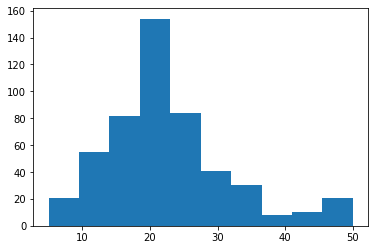

In [41]:
%matplotlib inline

plt.hist(boston_data["medv"])

A partir do histograma da variável resposta *medv*, observa-se que sua distribuição assemelha-se com uma normal, com valores mais frequentes no intervalo central e frequência reduzida nas caudas. 

###### Separação entre features e target e Padronização das features

In [42]:
# Separação do Banco
features_boston = boston_data.drop(columns = {"medv"})
target_boston = boston_data["medv"]
# Padronização das Features
scaler = StandardScaler()
features_boston_scaled = scaler.fit_transform(features_boston)

###### Separação do conjunto de treinamento (80%) e do conjunto de teste (20%)

In [43]:
features_boston_train, features_boston_test, target_boston_train, target_boston_test = \
    train_test_split(features_boston_scaled, target_boston, test_size = 0.2, random_state = 42)

###### Ajuste e Resultado do Primeiro Trabalho

In [44]:
lr_boston = LinearRegression()
modelo_lr_boston =lr_boston.fit(features_boston_train, target_boston_train);

# Validação
print("R^2: ", modelo_lr_boston.score(features_boston_test, target_boston_test))

print("\n")

print("Intercepto", modelo_lr_boston.intercept_)
for i in range(len(modelo_lr_boston.coef_)):
    print(boston_data.columns[i], modelo_lr_boston.coef_[i])

print("\n")
    
target_predicted = modelo_lr_boston.predict(features_boston_test)
print("EQM Conjunto Teste: ",round(mean_squared_error(target_boston_test, target_predicted),2))

R^2:  0.6687594935356322


Intercepto 22.485268239316902
crim -0.9714942298153109
zn 0.7015556186825168
indus 0.27675211756097745
chas 0.7065315219738251
nox -1.9914304346295502
rm 3.115718363958981
age -0.17706020680903325
dis -3.045770645410489
rad 2.282784712788725
tax -1.792604675752152
ptratio -1.9799535094590697
black 1.126498635557213
lstat -3.628149374371363


EQM Conjunto Teste:  24.29


###### Ajuste Árvore de Decisão

In [45]:
decisiontree = DecisionTreeRegressor(random_state=0)
arv_dec_boston = decisiontree.fit(features_boston_train, target_boston_train)

pred_arv_dec_boston = arv_dec_boston.predict(features_boston_test)

explained_variance = explained_variance_score(target_boston_test, pred_arv_dec_boston)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_boston_test, pred_arv_dec_boston)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_boston_test, pred_arv_dec_boston)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_boston_test, pred_arv_dec_boston),2))

Escore Variância Explicada:0.86
MAE: 2.36
R^2: 0.86
EQM Conjunto Teste:  10.09


###### Ajuste Floresta Aleatória

In [46]:
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
rand_for_boston = randomforest.fit(features_boston_train, target_boston_train)

pred_rand_for_boston = rand_for_boston.predict(features_boston_test)

explained_variance = explained_variance_score(target_boston_test, pred_rand_for_boston)
print('Escore Variância Explicada: {0:0.2f}'.format(explained_variance))

mae = mean_absolute_error(target_boston_test, pred_rand_for_boston)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_boston_test,pred_rand_for_boston)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste:",round(mean_squared_error(target_boston_test, pred_rand_for_boston),2))

Escore Variância Explicada: 0.87
MAE: 2.13
R^2: 0.87
EQM Conjunto Teste: 9.27


###### Ajuste SVM

In [47]:
svm = SVR(kernel="linear")
svm_boston = svm.fit(features_boston_train, target_boston_train)

pred_svm_boston = svm_boston.predict(features_boston_test)

explained_variance = explained_variance_score(target_boston_test, pred_svm_boston)
print('Escore Variância Explicada:{0:0.2f}'.format(explained_variance))

mae= mean_absolute_error(target_boston_test, pred_svm_boston)
print('MAE: {0:0.2f}'.format(mae))

r2score = r2_score(target_boston_test,pred_svm_boston)
print('R^2: {0:0.2f}'.format(r2score))

print("EQM Conjunto Teste: ",round(mean_squared_error(target_boston_test,pred_svm_boston),2))

Escore Variância Explicada:0.63
MAE: 3.10
R^2: 0.61
EQM Conjunto Teste:  28.9


###### Comparação e Análise dos Resultados

Nota-se que, os modelos ajustados via árvore de decisão e floresta aleatória obtiveram melhor valores do R2 se comparados com os valores obtidos na regressão linear feita anteriormente e no SVM para regressão aplicado agora. Comparando as métricas calculadas para os dois melhores modelos (árvore de decisão e a floresta aleatória), é possível observar que eles possuem valores muito próximos, porém, além da árvore possuir um R2 mais alto e um erro quadrático médio menor, ela possui como vantagem a sua interpretabilidade, portanto vai ser usada como referência de melhor modelo.

Abaixo, tem-se o gráfico com a importância de cada uma das covariáveis para a contrução desse modelo. A variável com maior importância é *rm*, que destaca-se muito em relação as demais, seguidas das covariáveis *lstat* e *dis*.

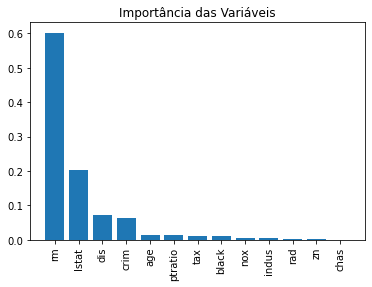

In [48]:
importances = arv_dec_boston.feature_importances_
indices = np.argsort(importances)[::-1]
names = [boston_data.columns.tolist()[i] for i in indices]
plt.figure()
plt.title("Importância das Variáveis")
plt.bar(range(features_boston_train.shape[1]),
importances[indices])
plt.xticks(range(features_boston_train.shape[1]), names,rotation=90)
plt.show()

### Problema 5

In [49]:
enem_data_na = pd.read_csv("data/DadosEnemCandidatosMG.csv", sep = ";", decimal = ",")
enem_data_na.head(5)

,IDADE,TP_SEXO,ST_CONCLUSAO,IN_TP_ENSINO,IN_CERTIFICADO,TP_ESTADO_CIVIL,TP_LINGUA,Q01,Q02,Q03,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,NU_NT_CN
0,20,M,3,,1,0,1,A,C,B,...,4,5,4,E,A,A,F,B,A,
1,31,F,1,1,0,1,0,A,A,A,...,5,5,5,D,A,A,B,B,A,
2,27,F,1,1,0,1,0,A,C,C,...,5,0,5,A,A,A,B,A,A,
3,19,F,1,1,0,0,1,B,A,I,...,5,4,4,B,A,A,B,A,A,342.3
4,26,F,1,1,0,0,1,A,I,B,...,5,0,5,C,A,A,D,B,A,411.6


In [50]:
enem_data_na.shape

(382179, 26)

A partir da visualização dos dados inicial é possível notar que esse banco de dados possui NAs, tanto em algumas covariáveis quanto na variável resposta. Como o objetivo principal do trabalho é avaliar diferentes modelos para prever a nota final dos candidatos e o banco de dados possui informações de muitos candidatos, optou-se por descartar as linhas com valores faltantes.

In [51]:
enem_data_na.replace(" ", pd.NaT, inplace=True)
enem_data = enem_data_na.dropna()
enem_data.head(5)

,IDADE,TP_SEXO,ST_CONCLUSAO,IN_TP_ENSINO,IN_CERTIFICADO,TP_ESTADO_CIVIL,TP_LINGUA,Q01,Q02,Q03,...,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,NU_NT_CN
3,19,F,1,1,0,0,1,B,A,I,...,5,4,4,B,A,A,B,A,A,342.3
4,26,F,1,1,0,0,1,A,I,B,...,5,0,5,C,A,A,D,B,A,411.6
6,24,F,1,1,0,0,0,B,A,A,...,5,2,5,A,A,A,B,A,A,397.8
7,30,F,1,1,0,1,1,A,A,A,...,5,0,5,C,A,A,A,A,A,461.8
8,29,M,1,1,0,1,1,B,B,A,...,5,5,5,F,A,A,B,A,A,566.8


In [52]:
enem_data.shape

(180638, 26)

Após a remoção de linhas que continham NAs, o tamanho do banco passou de 382179 observações para 180638. O banco continua sendo grande para o ajuste de um modelo para predição da resposta, dessa forma iremos prosseguir o estudo.

Outro detalhe importante para realizar o ajuste dos modelos é verificar como as variáveis estão sendo interpretadas, isto é, seus tipos. A seguir foram feitas uma série de transformações a fim de que o melhor ajuste possível fosse realizado.

* Alteração na codificação de algumas variáveis para aproveitar a sua característica ordinal;
* Alteração do tipo de algumas covariáveis para melhor ajuste;
* Criação de Variáveis Dummies para representar covariáveis categóricas.

In [53]:
enem_data = enem_data.replace({"Q01": {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 0},
                               "Q04": {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 0},
                               "Q05": {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 0},
                               "Q28": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
                               "Q29": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4},
                               "Q31": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5},
                               "Q32": {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}})

In [54]:
enem_data.dtypes

IDADE               int64
TP_SEXO            object
ST_CONCLUSAO        int64
IN_TP_ENSINO       object
IN_CERTIFICADO     object
TP_ESTADO_CIVIL     int64
TP_LINGUA           int64
Q01                 int64
Q02                object
Q03                object
Q04                 int64
Q05                 int64
Q06                object
Q07                object
Q08                object
Q24                 int64
Q25                 int64
Q26                 int64
Q27                 int64
Q28                 int64
Q29                 int64
Q30                object
Q31                 int64
Q32                 int64
Q33                object
NU_NT_CN           object
dtype: object

In [55]:
variavel_tipo = {'TP_SEXO': 'category',
                 'IN_TP_ENSINO': 'category',
                 'IN_CERTIFICADO': 'category',
                 'TP_ESTADO_CIVIL': 'category',
                 'TP_LINGUA': 'category',
                 'Q02': 'category',
                 'Q03': 'category',
                 'Q06': 'category',
                 'Q07': 'category',
                 'Q08': 'category',
                 'Q30': 'category',
                 'Q33': 'category',
                 'NU_NT_CN': 'float'}

enem_data = enem_data.astype(variavel_tipo)

colunas_categoricas = ['TP_SEXO','IN_TP_ENSINO','IN_CERTIFICADO','TP_ESTADO_CIVIL','TP_LINGUA','Q02','Q03',
                       'Q06','Q07','Q08','Q30','Q33']

enem_data = pd.get_dummies(enem_data, prefix = colunas_categoricas,
                           columns = colunas_categoricas)

In [56]:
enem_data.head(5)

,IDADE,ST_CONCLUSAO,Q01,Q04,Q05,Q24,Q25,Q26,Q27,Q28,...,Q30_E,Q30_F,Q30_G,Q30_H,Q33_A,Q33_B,Q33_E,Q33_F,Q33_G,Q33_H
3,19,1,2,1,0,4,5,4,4,1,...,0,0,0,0,1,0,0,0,0,0
4,26,1,1,1,1,5,5,0,5,2,...,0,0,0,0,1,0,0,0,0,0
6,24,1,2,1,2,4,5,2,5,0,...,0,0,0,0,1,0,0,0,0,0
7,30,1,1,1,0,3,5,0,5,2,...,0,0,0,0,1,0,0,0,0,0
8,29,1,2,1,1,5,5,5,5,5,...,0,0,0,0,1,0,0,0,0,0


###### Visualização da Variável Resposta

(array([4.4790e+03, 8.9510e+03, 8.9230e+03, 1.0652e+04, 1.2250e+04,
        1.2980e+04, 1.3031e+04, 1.2842e+04, 1.2870e+04, 1.3270e+04,
        1.4051e+04, 1.3661e+04, 1.2284e+04, 1.0188e+04, 7.2310e+03,
        4.7320e+03, 3.0550e+03, 1.9410e+03, 1.2870e+03, 7.9800e+02,
        4.9700e+02, 2.7600e+02, 1.7800e+02, 1.0300e+02, 6.0000e+01,
        2.7000e+01, 1.4000e+01, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([313.4 , 335.26, 357.12, 378.98, 400.84, 422.7 , 444.56, 466.42,
        488.28, 510.14, 532.  , 553.86, 575.72, 597.58, 619.44, 641.3 ,
        663.16, 685.02, 706.88, 728.74, 750.6 , 772.46, 794.32, 816.18,
        838.04, 859.9 , 881.76, 903.62, 925.48, 947.34, 969.2 ]),
 <BarContainer object of 30 artists>)

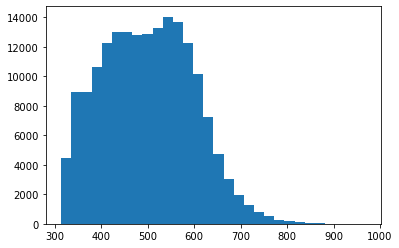

In [57]:
%matplotlib inline

plt.hist(enem_data["NU_NT_CN"], bins = 30)

A partir do histograma das notas dos candidatos, nota-se que notas maiores que 700 possuem frequência muito baixa, enquanto que o intervalo entre 400 e 600 possui uma alta frequência de ocorrência. É válido ressaltar também que a fequência na cauda da esquerda, notas entre 300 e 400, é maior quando comparada com a cauda da direita a partir do valor de 700

###### Separação entre *features* e *target*

In [58]:
features_enem_completo = enem_data.drop(columns = {"NU_NT_CN"})
target_enem = enem_data["NU_NT_CN"]

###### Redução de dimensionalidade com PCA

In [59]:
pca_enem = PCA(n_components=7)
features_enem = pd.DataFrame(pca_enem.fit_transform(features_enem_completo))
print(pca_enem.explained_variance_ratio_)

[0.74145071 0.07213386 0.03215247 0.02726498 0.0180025  0.01335513
 0.01026888]


Foram acrescentadas todas as componentes com proporção de variância total explicada superior a 1%.

In [60]:
features_enem

,0,1,2,3,4,5,6
0,-5.096825,1.881294,-0.049194,-1.269914,0.177578,0.460158,-1.319778
1,1.996968,-0.896362,-0.575564,2.446554,-0.066023,-0.025862,0.126951
2,-0.036270,0.006633,-0.750471,-0.918975,-0.954988,-0.232788,0.434058
3,6.021481,-2.183145,-0.509436,-0.781482,0.923778,-0.368388,-1.060296
4,5.067037,3.413432,-0.497058,-0.270488,3.321638,-0.192536,0.368460
...,...,...,...,...,...,...,...
180633,-5.614946,4.690949,2.062309,3.631568,3.637695,-0.060433,-0.536131
180634,-2.630241,-2.397690,4.605878,0.453406,0.546670,1.491202,-0.012190
180635,20.396355,4.885389,1.878123,3.856276,2.197889,-0.326590,1.003266
180636,7.260069,3.218886,2.128818,2.945593,2.206044,-0.456245,-0.350832


###### Visualização da relação entre a *Nota CN* e a primeira *feature* reduzida

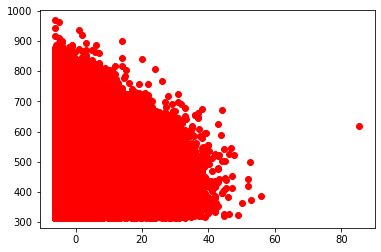

In [61]:
plt.plot(features_enem[0], target_enem, 'ro')
plt.show()

Pelo gráfico acima não percebemos nenhum tipo de relação clara entre as variáveis

###### Correlação entre as componentes principais selecionadas (7) e a *Nota CN*

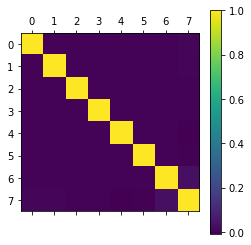

In [62]:
plt.matshow(pd.concat([features_enem, target_enem], axis=1).corr())
cb = plt.colorbar()
plt.show()

A correlação é muito próxima de 0 para todas as covariáveis e o *target*.

###### Correlação entre as covariáveis originais e o *target*

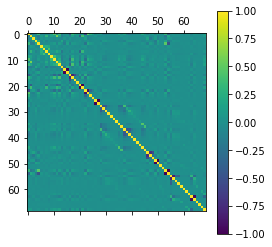

In [63]:
plt.matshow(enem_data.corr())
cb = plt.colorbar()
plt.show()

###### Ajuste Árvore de Decisão

In [64]:
decisiontree_enem = DecisionTreeRegressor(random_state=13)

var_exp = cross_val_score(decisiontree_enem, features_enem, target_enem, cv=10, scoring = "explained_variance")
mse = cross_val_score(decisiontree_enem, features_enem, target_enem, cv=10, scoring = "neg_mean_squared_error")
r2score = cross_val_score(decisiontree_enem, features_enem, target_enem, cv=10, scoring = "r2")

print('Variancia Explicada: ', np.round(var_exp,2) , "Média:", np.round(np.mean(var_exp),2))
print('Mean Squared Error: ', np.round(mse,2) ,"Média:", np.round(np.mean(mse),2))
print('R^2:', np.round(r2score,2), "Média:", np.round(np.mean(r2score),2))

Variancia Explicada:  [-0.72 -0.86 -0.5  -0.63 -0.65 -0.61 -0.67 -0.7  -0.71 -0.64] Média: -0.67
Mean Squared Error:  [-15305.14 -14733.56 -15163.65 -15790.58 -15719.45 -15631.52 -15249.34
 -15502.34 -15228.45 -15819.52] Média: -15414.36
R^2: [-0.72 -0.9  -0.5  -0.65 -0.66 -0.61 -0.67 -0.71 -0.72 -0.64] Média: -0.68


###### Ajuste Floresta Aleatória

In [65]:
randomforest_enem = RandomForestRegressor(random_state=13, n_jobs=-1, max_depth=2)

var_exp = cross_val_score(randomforest_enem, features_enem, target_enem,cv=10, scoring = "explained_variance")
mse = cross_val_score(randomforest_enem, features_enem, target_enem,cv=10, scoring = "neg_mean_squared_error")
r2score = cross_val_score(randomforest_enem, features_enem, target_enem,cv=10, scoring = "r2")

print('Variancia Explicada: ', np.round(var_exp,2), "Média:", np.round(np.mean(var_exp),2))
print('Mean Squared Error: ', np.round(mse,2), "Média:", np.round(np.mean(mse),2))
print('R^2:', np.round(r2score,2), "Média:", np.round(np.mean(r2score),2))

Variancia Explicada:  [0.04 0.04 0.09 0.04 0.04 0.06 0.06 0.06 0.06 0.07] Média: 0.06
Mean Squared Error:  [-8655.43 -8523.48 -9259.48 -9702.41 -9371.59 -9311.14 -8596.22 -8542.43
 -8356.48 -8933.86] Média: -8925.25
R^2: [ 0.03 -0.1   0.09 -0.01  0.01  0.04  0.06  0.06  0.06  0.07] Média: 0.03


###### Ajuste Regressão com Regularização

Para a aplicação de um Modelo de Regressão Lasso é necessário, anteriormente, padronizar as covariáveis.

In [66]:
scaler = StandardScaler()
features_enem_standardized = scaler.fit_transform(features_enem)

In [67]:
lasso_enem = Lasso(alpha=0.5)

var_exp = cross_val_score(lasso_enem, features_enem, target_enem, cv=10, scoring = "explained_variance")
mse = cross_val_score(lasso_enem, features_enem, target_enem, cv=10, scoring = "neg_mean_squared_error")
r2score = cross_val_score(lasso_enem, features_enem, target_enem, cv=10, scoring = "r2")

print('Variancia Explicada: ', np.round(var_exp,2), "Média:", np.round(np.mean(var_exp),2))
print('Mean Squared Error: ', np.round(mse,2), "Média:", np.round(np.mean(mse),2))
print('R^2:', np.round(r2score,2), "Média:", np.round(np.mean(r2score),2))

Variancia Explicada:  [0.09 0.07 0.12 0.08 0.08 0.09 0.09 0.08 0.08 0.1 ] Média: 0.09
Mean Squared Error:  [-8208.08 -8063.41 -8875.57 -9241.   -8992.66 -8971.11 -8331.34 -8363.51
 -8203.32 -8730.75] Média: -8598.08
R^2: [ 0.08 -0.04  0.12  0.04  0.05  0.08  0.09  0.08  0.08  0.1 ] Média: 0.07


###### Análise dos Resultados

Não foi encontrado no banco de dados nenhuma variável que tenha alguma relação útil para predição da nota dos estudantes em Ciências da Natureza. Foram aplicadas as transformações nas covariáveis (redução de dimensionalidade com PCA) e ainda assim as componentes não apresentaram relação com o *target*. Diante disso os modelos foram ajustados, mas conforme foi apresentado acima os seus resultados foram ruins para predição da variável de interesse.